# Convolutional Neural Networks

Notebook by Corey Adams, some modifications by Bethany Lusch

Up until transformers, convolutions were *the* state of the art in computer vision.  In many ways and applications they still are!

Large Language Models, which are what we'll focus on the rest of the series after this lecture, are really good at ordered, *tokenized data.  But there is lots of data that isn't _implicitly_ ordered like `images`, and their more general cousins `graphs`.

Today's lecture focuses on computer vision models, and particularly on convolutional neural networks.  There are a ton of applications you can do with these, and not nearly enough time to get into them.  Check out the extra references file to see some publications to get you started if you want to learn more.

Tip: this notebook is much faster on the GPU!


## Convolutional Networks: A brief historical context

![ImageNet Accuracy by Yearh](https://github.com/yahyunee/ai-science-training-series/blob/main/03_advanced_neural_networks/ImageNet.png?raw=1)

[reference](https://www.researchgate.net/publication/332452649_A_Roadmap_for_Foundational_Research_on_Artificial_Intelligence_in_Medical_Imaging_From_the_2018_NIHRSNAACRThe_Academy_Workshop)

In [8]:
import torch, torchvision

# Convolutional Building Blocks

We're going to go through some examples of building blocks for convolutional networks.  To help illustate some of these, let's use an image for examples:


In [9]:
from PIL import Image
# wget line useful in Google Colab
! wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/03_advanced_neural_networks/ALCF-Staff.jpg
alcf_image = Image.open("ALCF-Staff.jpg")

--2024-11-18 13:00:44--  https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/03_advanced_neural_networks/ALCF-Staff.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 417835 (408K) [image/jpeg]
Saving to: ‘ALCF-Staff.jpg’

ALCF-Staff.jpg      100%[===================>] 408.04K  --.-KB/s    in 0.03s   

2024-11-18 13:00:44 (12.1 MB/s) - ‘ALCF-Staff.jpg’ saved [417835/417835]



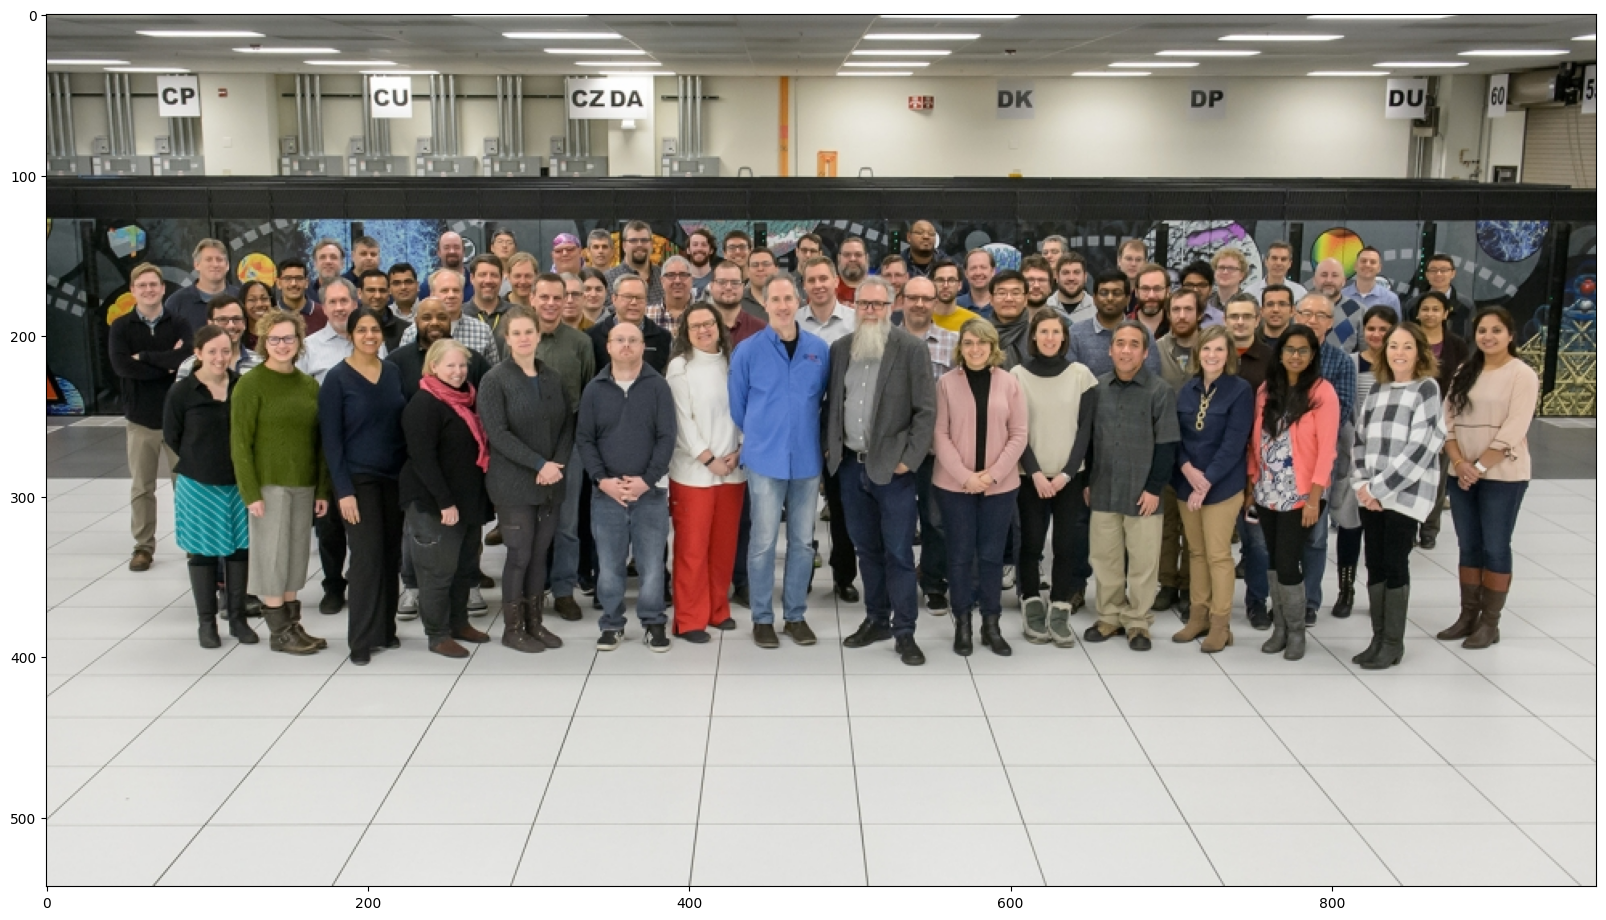

In [10]:
from matplotlib import pyplot as plt
figure = plt.figure(figsize=(20,20))
plt.imshow(alcf_image)
plt.show()

## Convolutions

Convolutions are a restriction of - and a specialization of - dense linear layers.  A convolution of an image produces another image, and each output pixel is a function of only it's local neighborhood of points.  This is called an _inductive bias_ and is a big reason why convolutions work for image data: neighboring pixels are correlated and you can operate on just those pixels at a time.

See examples of convolutions [here](https://github.com/vdumoulin/conv_arithmetic)

![image-2.png](https://github.com/yahyunee/ai-science-training-series/blob/main/03_advanced_neural_networks/conv_eqn.png?raw=1)

![image.png](https://github.com/yahyunee/ai-science-training-series/blob/main/03_advanced_neural_networks/conv.png?raw=1)


torch.Size([1, 3, 529, 951])
torch.Size([1, 3, 543, 965])


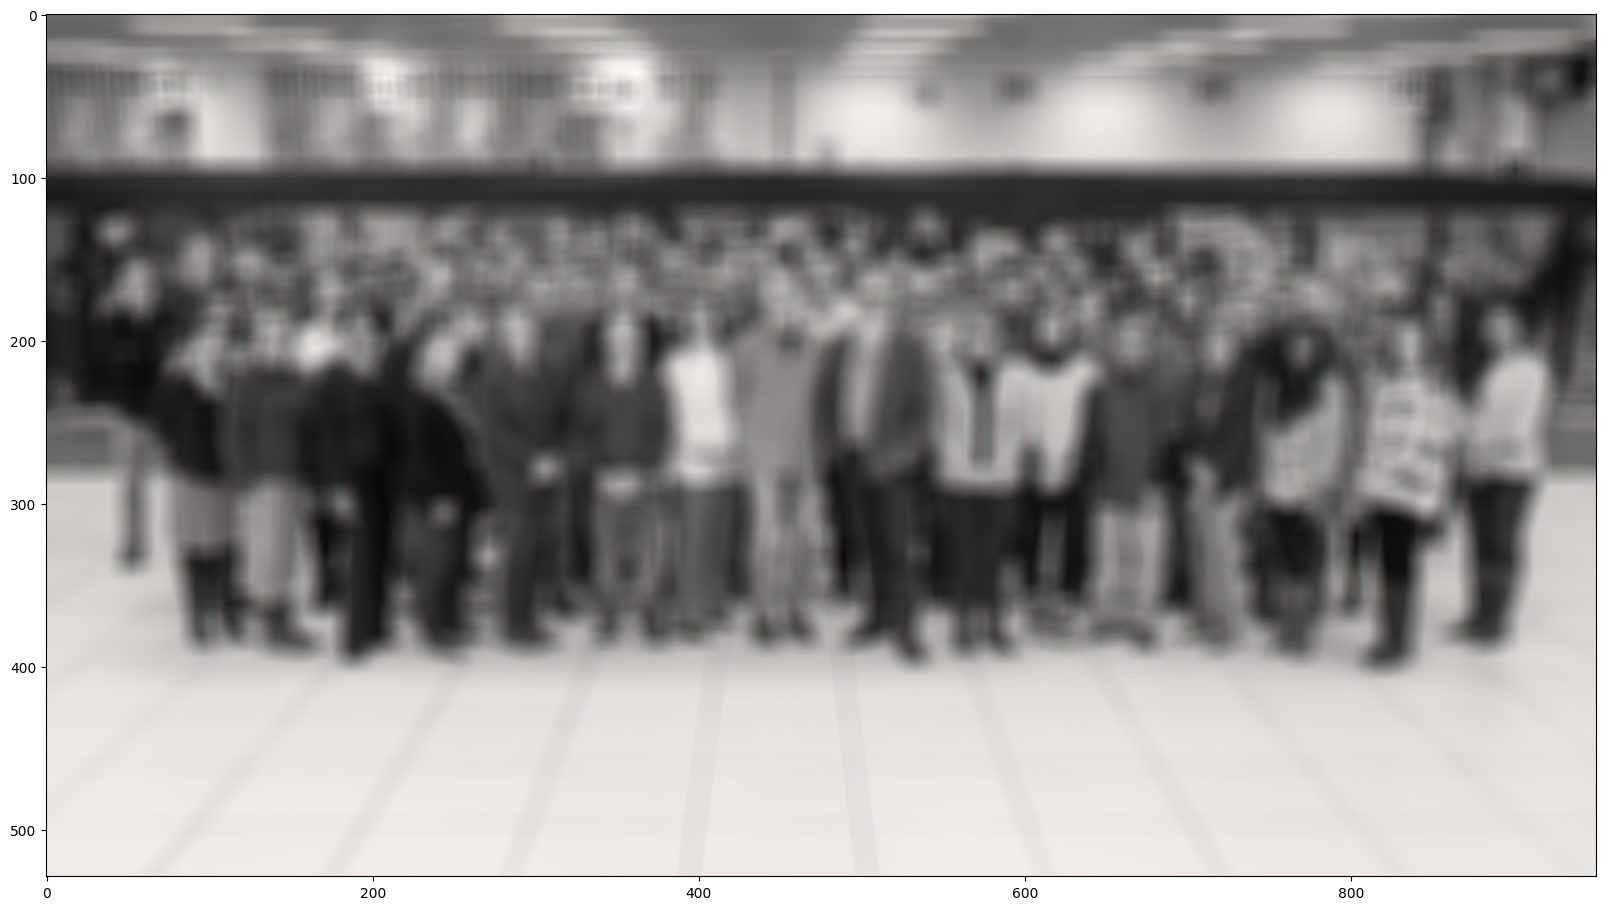

In [11]:
# Let's apply a convolution to the ALCF Staff photo:
alcf_tensor = torchvision.transforms.ToTensor()(alcf_image)

# Reshape the tensor to have a batch size of 1:
alcf_tensor = alcf_tensor.reshape((1,) + alcf_tensor.shape)

# Create a random convolution:
# shape is: (channels_in, channels_out, kernel_x, kernel_y)
conv_random = torch.rand((3,3,15,15))

alcf_rand = torch.nn.functional.conv2d(alcf_tensor, conv_random)
alcf_rand = (1./alcf_rand.max()) * alcf_rand
print(alcf_rand.shape)
alcf_rand = alcf_rand.reshape(alcf_rand.shape[1:])

print(alcf_tensor.shape)

rand_image = alcf_rand.permute((1,2,0)).cpu()

figure = plt.figure(figsize=(20,20))

plt.imshow(rand_image)


## Normalization

![Batch Norm](https://github.com/yahyunee/ai-science-training-series/blob/main/03_advanced_neural_networks/batch_norm.png?raw=1)
Reference: [Normalizations](https://arxiv.org/pdf/1903.10520.pdf)

Normalization is the act of transforming the mean and moment of your data to standard values (usually 0.0 and 1.0).  It's particularly useful in machine learning since it stabilizes training, and allows higher learning rates.

![Batch Normalization accelerates training](https://github.com/yahyunee/ai-science-training-series/blob/main/03_advanced_neural_networks/batch_norm_effect.png?raw=1)

Reference: [Batch Norm](https://arxiv.org/pdf/1502.03167.pdf)


torch.Size([1, 3, 543, 965])


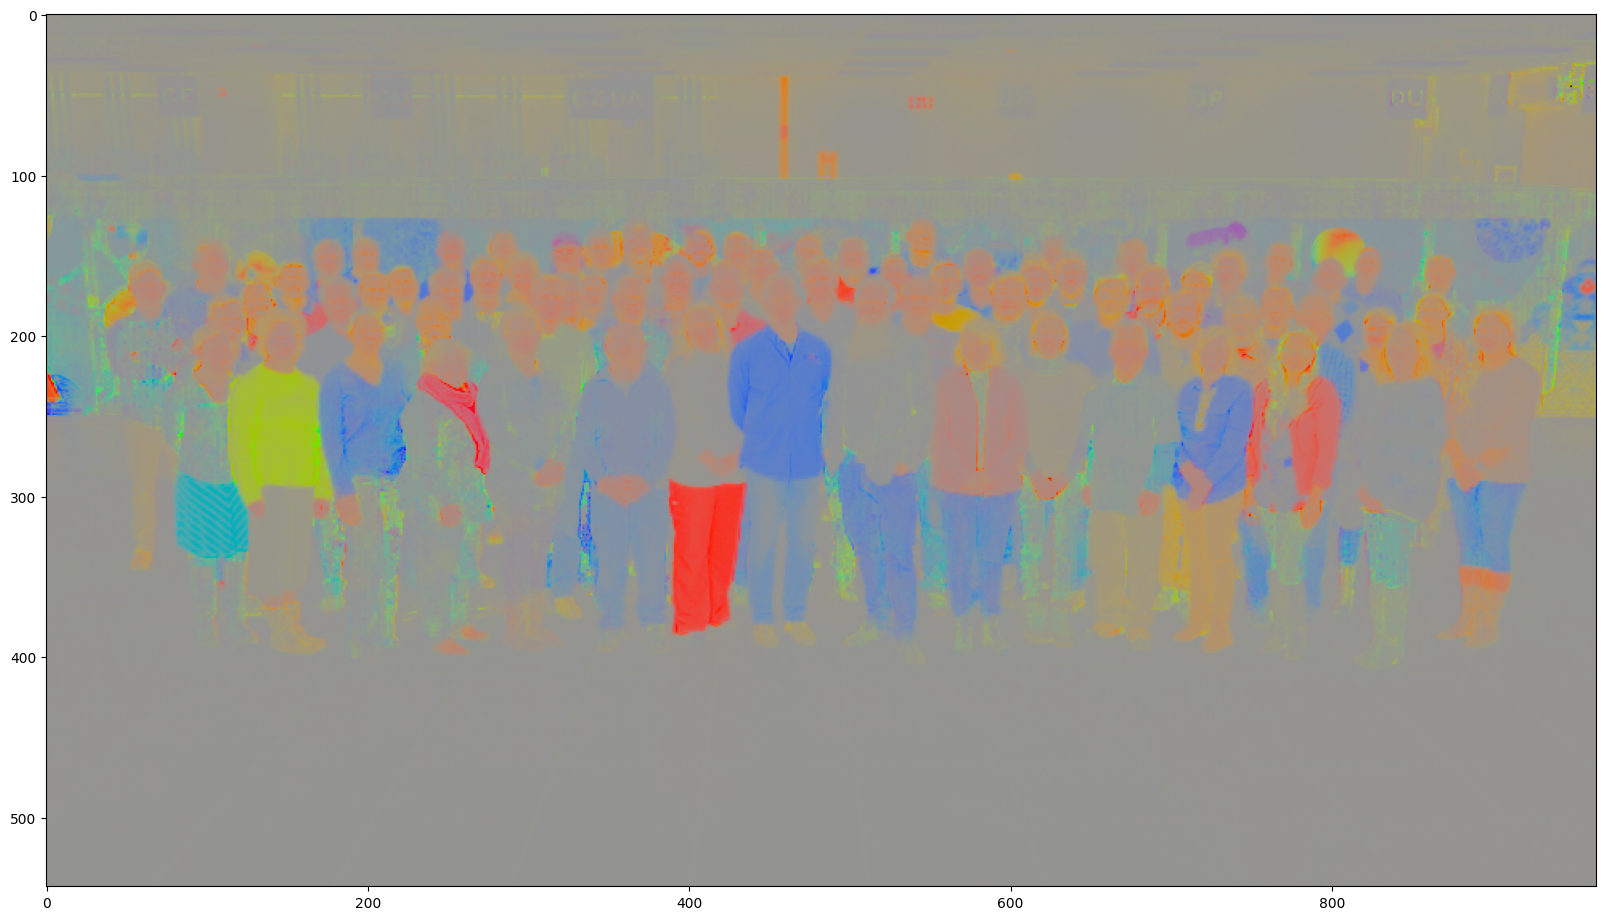

In [12]:
# Let's apply a normalization to the ALCF Staff photo:
alcf_tensor = torchvision.transforms.ToTensor()(alcf_image)

# Reshape the tensor to have a batch size of 1:
alcf_tensor = alcf_tensor.reshape((1,) + alcf_tensor.shape)


alcf_rand = torch.nn.functional.normalize(alcf_tensor)
alcf_rand = alcf_rand.reshape(alcf_rand.shape[1:])

print(alcf_tensor.shape)

rand_image = alcf_rand.permute((1,2,0)).cpu()

figure = plt.figure(figsize=(20,20))

plt.imshow(rand_image)



## Downsampling (And upsampling)

Downsampling is a critical component of convolutional and many vision models.  Because of the local-only nature of convolutional filters, learning large-range features can be too slow for convergence.  Downsampling of layers can bring information from far away closer, effectively changing what it means to be "local" as the input to a convolution.

![Convolutional Pooling](conv_pooling.png "Pooling")

[Reference](https://www.researchgate.net/publication/333593451_Application_of_Transfer_Learning_Using_Convolutional_Neural_Network_Method_for_Early_Detection_of_Terry's_Nail)



torch.Size([1, 3, 543, 965])


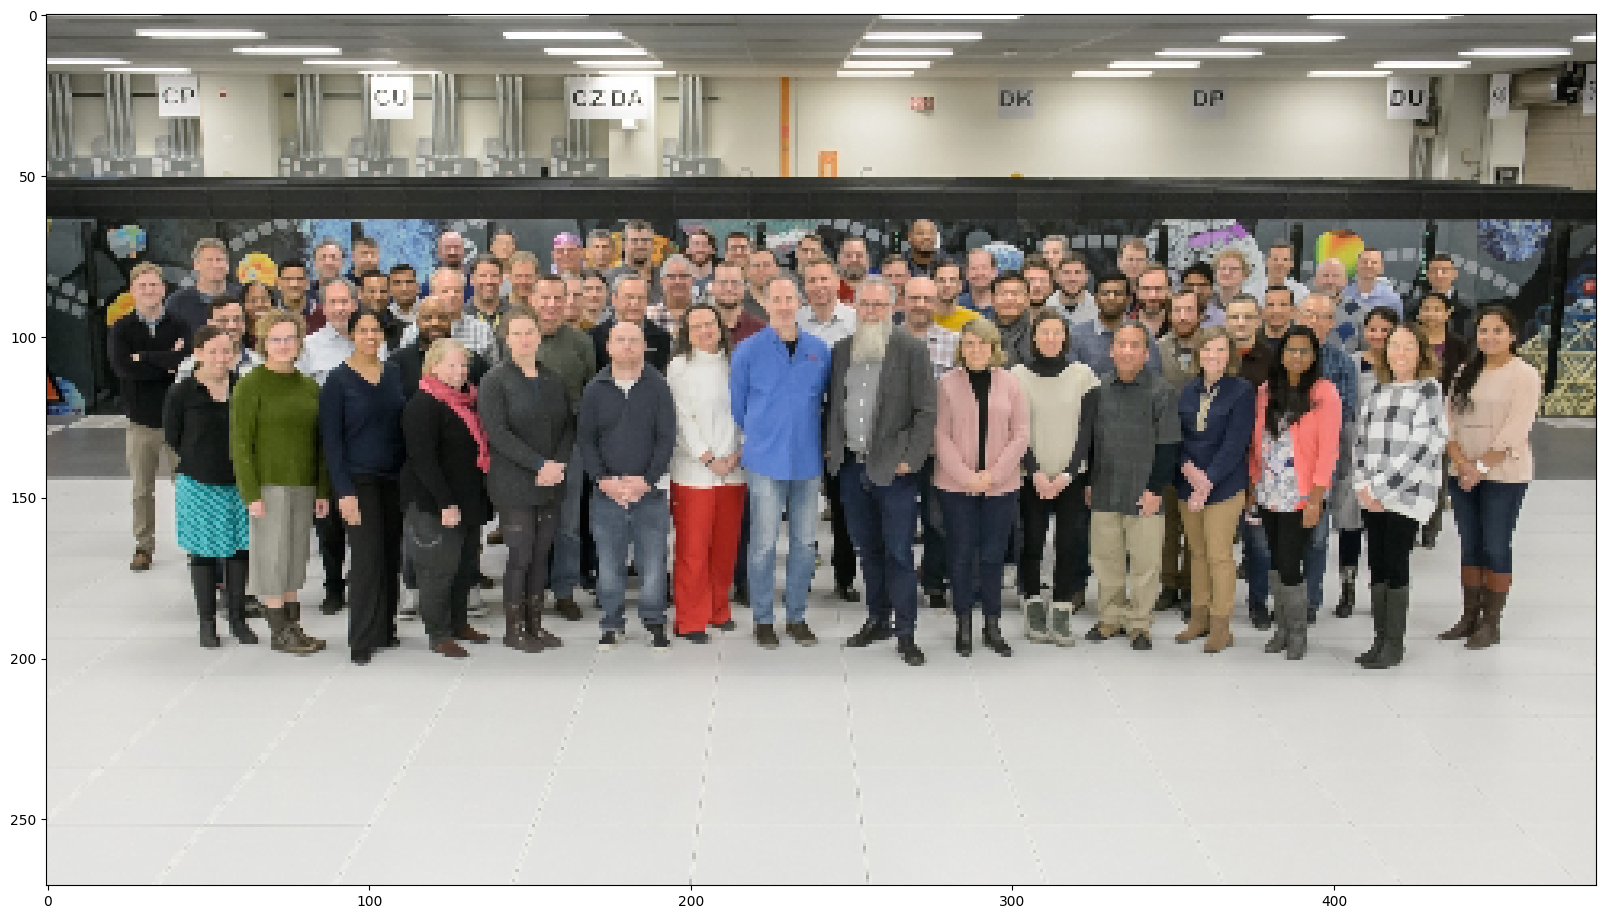

In [13]:
# Let's apply a normalization to the ALCF Staff photo:
alcf_tensor = torchvision.transforms.ToTensor()(alcf_image)

# Reshape the tensor to have a batch size of 1:
alcf_tensor = alcf_tensor.reshape((1,) + alcf_tensor.shape)


alcf_rand = torch.nn.functional.max_pool2d(alcf_tensor, 2)
alcf_rand = alcf_rand.reshape(alcf_rand.shape[1:])

print(alcf_tensor.shape)

rand_image = alcf_rand.permute((1,2,0)).cpu()

figure = plt.figure(figsize=(20,20))

plt.imshow(rand_image)


## Residual Connections

One issue, quickly encountered when making convolutional networks deeper and deeper, is the "Vanishing Gradients" problem.  As layers were stacked on top of each other, the size of updates dimished at the earlier layers of a convolutional network.  The paper "Deep Residual Learning for Image Recognition" solved this by introduction "residual connections" as skip layers.


Reference: [Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385.pdf)

![Residual Layer](https://github.com/yahyunee/ai-science-training-series/blob/main/03_advanced_neural_networks/residual_layer.png?raw=1)


Compare the performance of the models before and after the introduction of these layers:

![Resnet Performance vs. Plain network performance](https://github.com/yahyunee/ai-science-training-series/blob/main/03_advanced_neural_networks/resnet_comparison.png?raw=1)

If you have time to read only one paper on computer vision, make it this one!  Resnet was the first model to beat human accuracy on ImageNet and is one of the most impactful papers in AI ever published.

# Building a ConvNet

In this section we'll build and apply a conv net to the mnist dataset.  The layers here are loosely based off of the ConvNext architecture.  Why?  Because we're getting into LLM's soon, and this ConvNet uses LLM features.  ConvNext is an update to the ResNet architecture that outperforms it.

[ConvNext](https://arxiv.org/abs/2201.03545)


The dataset here is CIFAR-10 - slightly harder than MNIST but still relatively easy and computationally tractable.

In [14]:
from torchvision.transforms import v2
training_data = torchvision.datasets.CIFAR10(
    # Polaris: root="/lus/eagle/projects/datasets/CIFAR-10/",
    # Polaris: download=False,
    root="data",
    download=True,
    train=True,
    transform=v2.Compose([
        v2.ToTensor(),
        v2.RandomHorizontalFlip(),
        v2.RandomResizedCrop(size=32, scale=[0.85,1.0], antialias=False),
        v2.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    ])
)

test_data = torchvision.datasets.CIFAR10(
    # Polaris: root="/lus/eagle/projects/datasets/CIFAR-10/",
    # Polaris: download=False,
    root="data",
    download=True,
    train=False,
    transform=torchvision.transforms.ToTensor()
)

training_data, validation_data = torch.utils.data.random_split(training_data, [0.8, 0.2], generator=torch.Generator().manual_seed(55))

batch_size = 128

# The dataloader makes our dataset iterable
train_dataloader = torch.utils.data.DataLoader(training_data,
    batch_size=batch_size,
    pin_memory=True,
    shuffle=True,
    num_workers=2)
val_dataloader = torch.utils.data.DataLoader(validation_data,
    batch_size=batch_size,
    pin_memory=True,
    shuffle=False,
    num_workers=2)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


100%|██████████| 170M/170M [00:04<00:00, 35.2MB/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

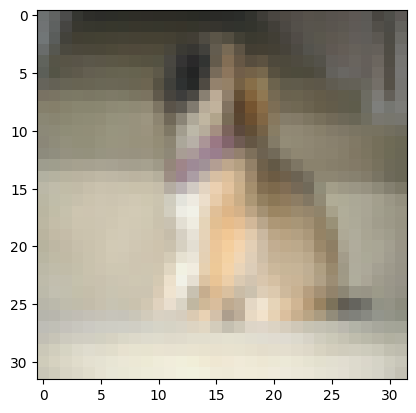

In [16]:
batch, (X, Y) = next(enumerate(train_dataloader))
plt.imshow(X[0].cpu().permute((1,2,0))); plt.show()

This code below is important as our models get bigger: this is wrapping the pytorch data loaders to put the data onto the GPU!

In [17]:
dev = torch.device(
    "cuda") if torch.cuda.is_available() else torch.device("cpu")


def preprocess(x, y):
    # CIFAR-10 is *color* images so 3 layers!
    return x.view(-1, 3, 32, 32).to(dev), y.to(dev)


class WrappedDataLoader:
    def __init__(self, dl, func):
        self.dl = dl
        self.func = func

    def __len__(self):
        return len(self.dl)

    def __iter__(self):
        for b in self.dl:
            yield (self.func(*b))


train_dataloader = WrappedDataLoader(train_dataloader, preprocess)
val_dataloader = WrappedDataLoader(val_dataloader, preprocess)

In [18]:
from torch import nn


class Downsampler(nn.Module):

    def __init__(self, in_channels, out_channels, shape, stride=2):
        super(Downsampler, self).__init__()

        self.norm = nn.LayerNorm([in_channels, *shape])

        self.downsample = nn.Conv2d(
            in_channels=in_channels,
            out_channels=out_channels,
            kernel_size = stride,
            stride = stride,
        )

    def forward(self, inputs):


        return self.downsample(self.norm(inputs))



class ConvNextBlock(nn.Module):
    """This block of operations is loosely based on this paper:

    """


    def __init__(self, in_channels, shape):
        super(ConvNextBlock, self).__init__()

        # Depthwise, seperable convolution with a large number of output filters:
        self.conv1 = nn.Conv2d(in_channels=in_channels,
                                     out_channels=in_channels,
                                     groups=in_channels,
                                     kernel_size=[7,7],
                                     padding='same' )

        self.norm = nn.LayerNorm([in_channels, *shape])

        # Two more convolutions:
        self.conv2 = nn.Conv2d(in_channels=in_channels,
                                     out_channels=4*in_channels,
                                     kernel_size=1)

        self.conv3 = nn.Conv2d(in_channels=4*in_channels,
                                     out_channels=in_channels,
                                     kernel_size=1
                                     )


    def forward(self, inputs):
        x = self.conv1(inputs)

        # The normalization layer:
        x = self.norm(x)

        x = self.conv2(x)

        # The non-linear activation layer:
        x = torch.nn.functional.gelu(x)

        x = self.conv3(x)

        # This makes it a residual network:
        return x + inputs


class Classifier(nn.Module):


    def __init__(self, n_initial_filters, n_stages, blocks_per_stage):
        super(Classifier, self).__init__()

        # This is a downsampling convolution that will produce patches of output.

        # This is similar to what vision transformers do to tokenize the images.
        self.stem = nn.Conv2d(in_channels=3,
                                    out_channels=n_initial_filters,
                                    kernel_size=1,
                                    stride=1)

        current_shape = [32, 32]

        self.norm1 = nn.LayerNorm([n_initial_filters,*current_shape])
        # self.norm1 = WrappedLayerNorm()

        current_n_filters = n_initial_filters

        self.layers = nn.Sequential()
        for i, n_blocks in enumerate(range(n_stages)):
            # Add a convnext block series:
            for _ in range(blocks_per_stage):
                self.layers.append(ConvNextBlock(in_channels=current_n_filters, shape=current_shape))
            # Add a downsampling layer:
            if i != n_stages - 1:
                # Skip downsampling if it's the last layer!
                self.layers.append(Downsampler(
                    in_channels=current_n_filters,
                    out_channels=2*current_n_filters,
                    shape = current_shape,
                    )
                )
                # Double the number of filters:
                current_n_filters = 2*current_n_filters
                # Cut the shape in half:
                current_shape = [ cs // 2 for cs in current_shape]



        self.head = nn.Sequential(
            nn.Flatten(),
            nn.LayerNorm(current_n_filters),
            nn.Linear(current_n_filters, 10)
        )
        # self.norm2 = nn.InstanceNorm2d(current_n_filters)
        # # This brings it down to one channel / class
        # self.bottleneck = nn.Conv2d(in_channels=current_n_filters, out_channels=10,
        #                                   kernel_size=1, stride=1)

    def forward(self, inputs):

        x = self.stem(inputs)
        # Apply a normalization after the initial patching:
        x = self.norm1(x)

        # Apply the main chunk of the network:
        x = self.layers(x)

        # Normalize and readout:
        x = nn.functional.avg_pool2d(x, x.shape[2:])
        x = self.head(x)

        return x



        # x = self.norm2(x)
        # x = self.bottleneck(x)

        # # Average pooling of the remaining spatial dimensions (and reshape) makes this label-like:
        # return nn.functional.avg_pool2d(x, kernel_size=x.shape[-2:]).reshape((-1,10))

In [19]:
!pip install torchinfo # if not on Polaris

In [20]:
model = Classifier(32, 4, 2).to(device=dev)

from torchinfo import summary

print(summary(model, input_size=(batch_size, 3, 32, 32)))


Layer (type:depth-idx)                   Output Shape              Param #
Classifier                               [128, 10]                 --
├─Conv2d: 1-1                            [128, 32, 32, 32]         128
├─LayerNorm: 1-2                         [128, 32, 32, 32]         65,536
├─Sequential: 1-3                        [128, 256, 4, 4]          --
│    └─ConvNextBlock: 2-1                [128, 32, 32, 32]         --
│    │    └─Conv2d: 3-1                  [128, 32, 32, 32]         1,600
│    │    └─LayerNorm: 3-2               [128, 32, 32, 32]         65,536
│    │    └─Conv2d: 3-3                  [128, 128, 32, 32]        4,224
│    │    └─Conv2d: 3-4                  [128, 32, 32, 32]         4,128
│    └─ConvNextBlock: 2-2                [128, 32, 32, 32]         --
│    │    └─Conv2d: 3-5                  [128, 32, 32, 32]         1,600
│    │    └─LayerNorm: 3-6               [128, 32, 32, 32]         65,536
│    │    └─Conv2d: 3-7                  [128, 128, 32, 32] 

In [21]:
def evaluate(dataloader, model, loss_fn, val_bar):
    # Set the model to evaluation mode - some NN pieces behave differently during training
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader)
    num_batches = len(dataloader)
    loss, correct = 0, 0

    # We can save computation and memory by not calculating gradients here - we aren't optimizing
    with torch.no_grad():
        # loop over all of the batches
        for X, y in dataloader:

            pred = model(X)
            loss += loss_fn(pred, y).item()
            # how many are correct in this batch? Tracking for accuracy
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            val_bar.update()

    loss /= num_batches
    correct /= (size*batch_size)

    accuracy = 100*correct
    return accuracy, loss

In [22]:
def train_one_epoch(dataloader, model, loss_fn, optimizer, progress_bar):
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # forward pass
        pred = model(X)
        loss = loss_fn(pred, y)

        # backward pass calculates gradients
        loss.backward()

        # take one step with these gradients
        optimizer.step()

        # resets the gradients
        optimizer.zero_grad()

        progress_bar.update()

In [23]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, weight_decay=0.01)

In [21]:
from tqdm.notebook import tqdm


epochs = 30
for j in range(epochs):
    with tqdm(total=len(train_dataloader), position=0, leave=True, desc=f"Train Epoch {j}") as train_bar:
        train_one_epoch(train_dataloader, model, loss_fn, optimizer, train_bar)

    # checking on the training & validation loss & accuracy
    # for training data - only once every 5 epochs (takes a while)
    if j % 5 == 0:
        with tqdm(total=len(train_dataloader), position=0, leave=True, desc=f"Validate (train) Epoch {j}") as train_eval:
            acc, loss = evaluate(train_dataloader, model, loss_fn, train_eval)
            print(f"Epoch {j}: training loss: {loss:.3f}, accuracy: {acc:.3f}")

    with tqdm(total=len(val_dataloader), position=0, leave=True, desc=f"Validate Epoch {j}") as val_bar:

        acc_val, loss_val = evaluate(val_dataloader, model, loss_fn, val_bar)
        print(f"Epoch {j}: validation loss: {loss_val:.3f}, accuracy: {acc_val:.3f}")


Train Epoch 0:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 0:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 0: training loss: 1.983, accuracy: 27.736


Validate Epoch 0:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 0: validation loss: 1.991, accuracy: 27.364


Train Epoch 1:   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 1:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 1: validation loss: 1.950, accuracy: 28.550


Train Epoch 2:   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 2:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 2: validation loss: 1.951, accuracy: 28.837


Train Epoch 3:   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 3:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 3: validation loss: 1.892, accuracy: 30.845


Train Epoch 4:   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 4:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 4: validation loss: 1.889, accuracy: 33.129


Train Epoch 5:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 5:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 5: training loss: 1.922, accuracy: 28.035


Validate Epoch 5:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 5: validation loss: 1.935, accuracy: 27.561


Train Epoch 6:   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 6:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 6: validation loss: 1.892, accuracy: 31.250


Train Epoch 7:   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 7:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 7: validation loss: 1.807, accuracy: 33.792


Train Epoch 8:   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 8:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 8: validation loss: 1.795, accuracy: 35.314


Train Epoch 9:   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 9:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 9: validation loss: 1.772, accuracy: 36.007


Train Epoch 10:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 10:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 10: training loss: 1.778, accuracy: 36.324


Validate Epoch 10:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 10: validation loss: 1.784, accuracy: 36.600


Train Epoch 11:   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 11:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 11: validation loss: 1.793, accuracy: 34.939


Train Epoch 12:   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 12:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 12: validation loss: 1.694, accuracy: 37.787


Train Epoch 13:   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 13:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 13: validation loss: 1.691, accuracy: 38.242


Train Epoch 14:   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 14:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 14: validation loss: 1.651, accuracy: 39.972


Train Epoch 15:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 15:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 15: training loss: 1.639, accuracy: 41.179


Validate Epoch 15:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 15: validation loss: 1.639, accuracy: 40.684


Train Epoch 16:   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 16:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 16: validation loss: 1.643, accuracy: 39.953


Train Epoch 17:   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 17:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 17: validation loss: 1.600, accuracy: 41.683


Train Epoch 18:   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 18:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 18: validation loss: 1.584, accuracy: 42.138


Train Epoch 19:   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 19:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 19: validation loss: 1.636, accuracy: 40.932


Train Epoch 20:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 20:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 20: training loss: 1.590, accuracy: 42.754


Validate Epoch 20:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 20: validation loss: 1.586, accuracy: 42.662


Train Epoch 21:   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 21:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 21: validation loss: 1.581, accuracy: 42.385


Train Epoch 22:   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 22:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 22: validation loss: 1.571, accuracy: 43.097


Train Epoch 23:   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 23:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 23: validation loss: 1.572, accuracy: 43.058


Train Epoch 24:   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 24:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 24: validation loss: 1.520, accuracy: 44.264


Train Epoch 25:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 25:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 25: training loss: 1.536, accuracy: 43.882


Validate Epoch 25:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 25: validation loss: 1.535, accuracy: 43.523


Train Epoch 26:   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 26:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 26: validation loss: 1.529, accuracy: 44.551


Train Epoch 27:   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 27:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 27: validation loss: 1.522, accuracy: 43.542


Train Epoch 28:   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 28:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 28: validation loss: 1.548, accuracy: 43.997


Train Epoch 29:   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 29:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 29: validation loss: 1.475, accuracy: 46.717


# Homework 1:

In this notebook, we've learned about some basic convolutional networks and trained one on CIFAR-10 images.  It did ... OK.  There is significant overfitting of this model.  There are some ways to address that, but we didn't have time to get into that in this session.

Meanwhile, your homework (part 1) for this week is to try to train the model again but with a different architecture.  Change one or more of the following:
- The number of convolutions between downsampling
- The number of filters in each layer
- The initial "patchify" layer
- Another hyper-parameter of your choosing


And compare your final validation accuracy to the accuracy shown here.  Can you beat the validation accuracy shown?

For full credit on the homework, you need to show (via text, or make a plot) the training and validation data sets' performance (loss and accuracy) for all the epochs you train.  You also need to explain, in several sentences, what you changed in the network and why you think it makes a difference.

### Change "the number of convolutions between downsampling"

Model Summary for num_conv = 1:
Layer (type:depth-idx)                   Output Shape              Param #
Classifier                               [128, 10]                 --
├─Conv2d: 1-1                            [128, 32, 32, 32]         128
├─LayerNorm: 1-2                         [128, 32, 32, 32]         65,536
├─Sequential: 1-3                        [128, 256, 4, 4]          --
│    └─ConvNextBlock: 2-1                [128, 32, 32, 32]         --
│    │    └─Conv2d: 3-1                  [128, 32, 32, 32]         1,600
│    │    └─LayerNorm: 3-2               [128, 32, 32, 32]         65,536
│    │    └─Conv2d: 3-3                  [128, 128, 32, 32]        4,224
│    │    └─Conv2d: 3-4                  [128, 32, 32, 32]         4,128
│    └─Downsampler: 2-2                  [128, 64, 16, 16]         --
│    │    └─LayerNorm: 3-5               [128, 32, 32, 32]         65,536
│    │    └─Conv2d: 3-6                  [128, 64, 16, 16]         8,256
│    └─ConvNextBlock: 2-3   

Train Epoch 0 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 0 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 0 (num_conv = 1): training loss: 2.182, accuracy: 19.154


Validate Epoch 0 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 0 (num_conv = 1): validation loss: 2.184, accuracy: 18.740


Train Epoch 1 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 1 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 1 (num_conv = 1): validation loss: 2.068, accuracy: 21.806


Train Epoch 2 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 2 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 2 (num_conv = 1): validation loss: 1.988, accuracy: 26.384


Train Epoch 3 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 3 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 3 (num_conv = 1): validation loss: 1.947, accuracy: 28.412


Train Epoch 4 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 4 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 4 (num_conv = 1): validation loss: 1.934, accuracy: 29.193


Train Epoch 5 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 5 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 5 (num_conv = 1): training loss: 1.862, accuracy: 32.675


Validate Epoch 5 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 5 (num_conv = 1): validation loss: 1.869, accuracy: 31.982


Train Epoch 6 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 6 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 6 (num_conv = 1): validation loss: 1.847, accuracy: 33.792


Train Epoch 7 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 7 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 7 (num_conv = 1): validation loss: 1.831, accuracy: 32.565


Train Epoch 8 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 8 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 8 (num_conv = 1): validation loss: 1.811, accuracy: 34.879


Train Epoch 9 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 9 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 9 (num_conv = 1): validation loss: 1.793, accuracy: 35.245


Train Epoch 10 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 10 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 10 (num_conv = 1): training loss: 1.740, accuracy: 37.762


Validate Epoch 10 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 10 (num_conv = 1): validation loss: 1.732, accuracy: 37.816


Train Epoch 11 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 11 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 11 (num_conv = 1): validation loss: 1.727, accuracy: 37.945


Train Epoch 12 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 12 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 12 (num_conv = 1): validation loss: 1.678, accuracy: 39.646


Train Epoch 13 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 13 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 13 (num_conv = 1): validation loss: 1.678, accuracy: 39.409


Train Epoch 14 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 14 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 14 (num_conv = 1): validation loss: 1.663, accuracy: 39.686


Train Epoch 15 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 15 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 15 (num_conv = 1): training loss: 1.664, accuracy: 40.345


Validate Epoch 15 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 15 (num_conv = 1): validation loss: 1.663, accuracy: 39.962


Train Epoch 16 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 16 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 16 (num_conv = 1): validation loss: 1.622, accuracy: 41.307


Train Epoch 17 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 17 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 17 (num_conv = 1): validation loss: 1.686, accuracy: 38.964


Train Epoch 18 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 18 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 18 (num_conv = 1): validation loss: 1.589, accuracy: 42.741


Train Epoch 19 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 19 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 19 (num_conv = 1): validation loss: 1.594, accuracy: 42.474


Train Epoch 20 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 20 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 20 (num_conv = 1): training loss: 1.604, accuracy: 41.686


Validate Epoch 20 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 20 (num_conv = 1): validation loss: 1.605, accuracy: 41.505


Train Epoch 21 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 21 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 21 (num_conv = 1): validation loss: 1.550, accuracy: 43.770


Train Epoch 22 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 22 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 22 (num_conv = 1): validation loss: 1.555, accuracy: 43.701


Train Epoch 23 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 23 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 23 (num_conv = 1): validation loss: 1.558, accuracy: 44.739


Train Epoch 24 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 24 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 24 (num_conv = 1): validation loss: 1.532, accuracy: 44.739


Train Epoch 25 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 25 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 25 (num_conv = 1): training loss: 1.592, accuracy: 40.962


Validate Epoch 25 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 25 (num_conv = 1): validation loss: 1.593, accuracy: 40.645


Train Epoch 26 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 26 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 26 (num_conv = 1): validation loss: 1.512, accuracy: 45.619


Train Epoch 27 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 27 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 27 (num_conv = 1): validation loss: 1.518, accuracy: 45.955


Train Epoch 28 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 28 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 28 (num_conv = 1): validation loss: 1.492, accuracy: 46.638


Train Epoch 29 (num_conv = 1):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 29 (num_conv = 1):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 29 (num_conv = 1): validation loss: 1.501, accuracy: 45.303
Model Summary for num_conv = 2:
Layer (type:depth-idx)                   Output Shape              Param #
Classifier                               [128, 10]                 --
├─Conv2d: 1-1                            [128, 32, 32, 32]         128
├─LayerNorm: 1-2                         [128, 32, 32, 32]         65,536
├─Sequential: 1-3                        [128, 256, 4, 4]          --
│    └─ConvNextBlock: 2-1                [128, 32, 32, 32]         --
│    │    └─Conv2d: 3-1                  [128, 32, 32, 32]         1,600
│    │    └─LayerNorm: 3-2               [128, 32, 32, 32]         65,536
│    │    └─Conv2d: 3-3                  [128, 128, 32, 32]        4,224
│    │    └─Conv2d: 3-4                  [128, 32, 32, 32]         4,128
│    └─ConvNextBlock: 2-2                [128, 32, 32, 32]         --
│    │    └─Conv2d: 3-5                  [128, 32, 32, 32]         1,600
│    │    └─LayerNorm: 3-6          

Train Epoch 0 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 0 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 0 (num_conv = 2): training loss: 2.228, accuracy: 17.869


Validate Epoch 0 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 0 (num_conv = 2): validation loss: 2.229, accuracy: 17.316


Train Epoch 1 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 1 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 1 (num_conv = 2): validation loss: 2.043, accuracy: 23.991


Train Epoch 2 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 2 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 2 (num_conv = 2): validation loss: 2.017, accuracy: 24.575


Train Epoch 3 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 3 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 3 (num_conv = 2): validation loss: 1.904, accuracy: 31.319


Train Epoch 4 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 4 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 4 (num_conv = 2): validation loss: 1.905, accuracy: 30.716


Train Epoch 5 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 5 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 5 (num_conv = 2): training loss: 1.867, accuracy: 33.035


Validate Epoch 5 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 5 (num_conv = 2): validation loss: 1.863, accuracy: 33.149


Train Epoch 6 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 6 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 6 (num_conv = 2): validation loss: 1.808, accuracy: 34.019


Train Epoch 7 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 7 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 7 (num_conv = 2): validation loss: 1.756, accuracy: 37.075


Train Epoch 8 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 8 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 8 (num_conv = 2): validation loss: 1.801, accuracy: 33.950


Train Epoch 9 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 9 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 9 (num_conv = 2): validation loss: 1.696, accuracy: 39.201


Train Epoch 10 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 10 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 10 (num_conv = 2): training loss: 1.681, accuracy: 38.241


Validate Epoch 10 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 10 (num_conv = 2): validation loss: 1.674, accuracy: 38.182


Train Epoch 11 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 11 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 11 (num_conv = 2): validation loss: 1.683, accuracy: 38.311


Train Epoch 12 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 12 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 12 (num_conv = 2): validation loss: 1.626, accuracy: 41.426


Train Epoch 13 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 13 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 13 (num_conv = 2): validation loss: 1.602, accuracy: 41.386


Train Epoch 14 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 14 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 14 (num_conv = 2): validation loss: 1.552, accuracy: 43.869


Train Epoch 15 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 15 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 15 (num_conv = 2): training loss: 1.568, accuracy: 43.900


Validate Epoch 15 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 15 (num_conv = 2): validation loss: 1.574, accuracy: 43.295


Train Epoch 16 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 16 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 16 (num_conv = 2): validation loss: 1.543, accuracy: 43.720


Train Epoch 17 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 17 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 17 (num_conv = 2): validation loss: 1.557, accuracy: 43.997


Train Epoch 18 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 18 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 18 (num_conv = 2): validation loss: 1.514, accuracy: 45.253


Train Epoch 19 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 19 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 19 (num_conv = 2): validation loss: 1.521, accuracy: 45.283


Train Epoch 20 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 20 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 20 (num_conv = 2): training loss: 1.545, accuracy: 44.506


Validate Epoch 20 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 20 (num_conv = 2): validation loss: 1.549, accuracy: 43.760


Train Epoch 21 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 21 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 21 (num_conv = 2): validation loss: 1.465, accuracy: 47.389


Train Epoch 22 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 22 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 22 (num_conv = 2): validation loss: 1.510, accuracy: 46.450


Train Epoch 23 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 23 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 23 (num_conv = 2): validation loss: 1.465, accuracy: 47.597


Train Epoch 24 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 24 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 24 (num_conv = 2): validation loss: 1.462, accuracy: 47.617


Train Epoch 25 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 25 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 25 (num_conv = 2): training loss: 1.419, accuracy: 48.912


Validate Epoch 25 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 25 (num_conv = 2): validation loss: 1.422, accuracy: 48.616


Train Epoch 26 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 26 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 26 (num_conv = 2): validation loss: 1.424, accuracy: 48.487


Train Epoch 27 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 27 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 27 (num_conv = 2): validation loss: 1.409, accuracy: 49.476


Train Epoch 28 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 28 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 28 (num_conv = 2): validation loss: 1.405, accuracy: 49.219


Train Epoch 29 (num_conv = 2):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 29 (num_conv = 2):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 29 (num_conv = 2): validation loss: 1.393, accuracy: 50.059
Model Summary for num_conv = 3:
Layer (type:depth-idx)                   Output Shape              Param #
Classifier                               [128, 10]                 --
├─Conv2d: 1-1                            [128, 32, 32, 32]         128
├─LayerNorm: 1-2                         [128, 32, 32, 32]         65,536
├─Sequential: 1-3                        [128, 256, 4, 4]          --
│    └─ConvNextBlock: 2-1                [128, 32, 32, 32]         --
│    │    └─Conv2d: 3-1                  [128, 32, 32, 32]         1,600
│    │    └─LayerNorm: 3-2               [128, 32, 32, 32]         65,536
│    │    └─Conv2d: 3-3                  [128, 128, 32, 32]        4,224
│    │    └─Conv2d: 3-4                  [128, 32, 32, 32]         4,128
│    └─ConvNextBlock: 2-2                [128, 32, 32, 32]         --
│    │    └─Conv2d: 3-5                  [128, 32, 32, 32]         1,600
│    │    └─LayerNorm: 3-6          

Train Epoch 0 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 0 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 0 (num_conv = 3): training loss: 2.181, accuracy: 20.525


Validate Epoch 0 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 0 (num_conv = 3): validation loss: 2.184, accuracy: 20.342


Train Epoch 1 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 1 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 1 (num_conv = 3): validation loss: 1.991, accuracy: 27.670


Train Epoch 2 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 2 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 2 (num_conv = 3): validation loss: 2.030, accuracy: 27.779


Train Epoch 3 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 3 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 3 (num_conv = 3): validation loss: 1.880, accuracy: 32.367


Train Epoch 4 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 4 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 4 (num_conv = 3): validation loss: 1.800, accuracy: 35.423


Train Epoch 5 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 5 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 5 (num_conv = 3): training loss: 1.767, accuracy: 36.661


Validate Epoch 5 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 5 (num_conv = 3): validation loss: 1.761, accuracy: 36.472


Train Epoch 6 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 6 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 6 (num_conv = 3): validation loss: 1.715, accuracy: 37.767


Train Epoch 7 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 7 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 7 (num_conv = 3): validation loss: 1.668, accuracy: 39.715


Train Epoch 8 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 8 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 8 (num_conv = 3): validation loss: 1.636, accuracy: 40.526


Train Epoch 9 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 9 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 9 (num_conv = 3): validation loss: 1.621, accuracy: 40.714


Train Epoch 10 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 10 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 10 (num_conv = 3): training loss: 1.600, accuracy: 42.777


Validate Epoch 10 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 10 (num_conv = 3): validation loss: 1.596, accuracy: 42.326


Train Epoch 11 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 11 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 11 (num_conv = 3): validation loss: 1.584, accuracy: 42.494


Train Epoch 12 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 12 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 12 (num_conv = 3): validation loss: 1.568, accuracy: 43.463


Train Epoch 13 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 13 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 13 (num_conv = 3): validation loss: 1.580, accuracy: 43.087


Train Epoch 14 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 14 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 14 (num_conv = 3): validation loss: 1.512, accuracy: 44.907


Train Epoch 15 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 15 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 15 (num_conv = 3): training loss: 1.577, accuracy: 43.740


Validate Epoch 15 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 15 (num_conv = 3): validation loss: 1.574, accuracy: 43.443


Train Epoch 16 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 16 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 16 (num_conv = 3): validation loss: 1.466, accuracy: 46.905


Train Epoch 17 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 17 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 17 (num_conv = 3): validation loss: 1.543, accuracy: 44.640


Train Epoch 18 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 18 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 18 (num_conv = 3): validation loss: 1.511, accuracy: 45.184


Train Epoch 19 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 19 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 19 (num_conv = 3): validation loss: 1.479, accuracy: 47.221


Train Epoch 20 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 20 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 20 (num_conv = 3): training loss: 1.449, accuracy: 48.353


Validate Epoch 20 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 20 (num_conv = 3): validation loss: 1.443, accuracy: 48.309


Train Epoch 21 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 21 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 21 (num_conv = 3): validation loss: 1.424, accuracy: 48.863


Train Epoch 22 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 22 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 22 (num_conv = 3): validation loss: 1.433, accuracy: 48.408


Train Epoch 23 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 23 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 23 (num_conv = 3): validation loss: 1.453, accuracy: 47.854


Train Epoch 24 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 24 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 24 (num_conv = 3): validation loss: 1.433, accuracy: 48.339


Train Epoch 25 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 25 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 25 (num_conv = 3): training loss: 1.400, accuracy: 49.528


Validate Epoch 25 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 25 (num_conv = 3): validation loss: 1.399, accuracy: 49.347


Train Epoch 26 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 26 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 26 (num_conv = 3): validation loss: 1.387, accuracy: 50.346


Train Epoch 27 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 27 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 27 (num_conv = 3): validation loss: 1.406, accuracy: 48.348


Train Epoch 28 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 28 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 28 (num_conv = 3): validation loss: 1.421, accuracy: 48.972


Train Epoch 29 (num_conv = 3):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 29 (num_conv = 3):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 29 (num_conv = 3): validation loss: 1.402, accuracy: 49.436
Model Summary for num_conv = 4:
Layer (type:depth-idx)                   Output Shape              Param #
Classifier                               [128, 10]                 --
├─Conv2d: 1-1                            [128, 32, 32, 32]         128
├─LayerNorm: 1-2                         [128, 32, 32, 32]         65,536
├─Sequential: 1-3                        [128, 256, 4, 4]          --
│    └─ConvNextBlock: 2-1                [128, 32, 32, 32]         --
│    │    └─Conv2d: 3-1                  [128, 32, 32, 32]         1,600
│    │    └─LayerNorm: 3-2               [128, 32, 32, 32]         65,536
│    │    └─Conv2d: 3-3                  [128, 128, 32, 32]        4,224
│    │    └─Conv2d: 3-4                  [128, 32, 32, 32]         4,128
│    └─ConvNextBlock: 2-2                [128, 32, 32, 32]         --
│    │    └─Conv2d: 3-5                  [128, 32, 32, 32]         1,600
│    │    └─LayerNorm: 3-6          

Train Epoch 0 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 0 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 0 (num_conv = 4): training loss: 2.122, accuracy: 23.116


Validate Epoch 0 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 0 (num_conv = 4): validation loss: 2.128, accuracy: 22.725


Train Epoch 1 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 1 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 1 (num_conv = 4): validation loss: 2.068, accuracy: 24.150


Train Epoch 2 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 2 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 2 (num_conv = 4): validation loss: 1.912, accuracy: 31.715


Train Epoch 3 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 3 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 3 (num_conv = 4): validation loss: 1.812, accuracy: 34.444


Train Epoch 4 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 4 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 4 (num_conv = 4): validation loss: 1.770, accuracy: 35.502


Train Epoch 5 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 5 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 5 (num_conv = 4): training loss: 1.716, accuracy: 38.561


Validate Epoch 5 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 5 (num_conv = 4): validation loss: 1.714, accuracy: 38.410


Train Epoch 6 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 6 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 6 (num_conv = 4): validation loss: 1.682, accuracy: 39.260


Train Epoch 7 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 7 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 7 (num_conv = 4): validation loss: 1.639, accuracy: 40.665


Train Epoch 8 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 8 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 8 (num_conv = 4): validation loss: 1.612, accuracy: 41.614


Train Epoch 9 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 9 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 9 (num_conv = 4): validation loss: 1.701, accuracy: 38.973


Train Epoch 10 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 10 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 10 (num_conv = 4): training loss: 1.553, accuracy: 44.466


Validate Epoch 10 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 10 (num_conv = 4): validation loss: 1.548, accuracy: 43.958


Train Epoch 11 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 11 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 11 (num_conv = 4): validation loss: 1.527, accuracy: 45.065


Train Epoch 12 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 12 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 12 (num_conv = 4): validation loss: 1.507, accuracy: 45.253


Train Epoch 13 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 13 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 13 (num_conv = 4): validation loss: 1.602, accuracy: 42.692


Train Epoch 14 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 14 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 14 (num_conv = 4): validation loss: 1.518, accuracy: 44.808


Train Epoch 15 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 15 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 15 (num_conv = 4): training loss: 1.495, accuracy: 45.996


Validate Epoch 15 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 15 (num_conv = 4): validation loss: 1.506, accuracy: 45.214


Train Epoch 16 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 16 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 16 (num_conv = 4): validation loss: 1.471, accuracy: 46.697


Train Epoch 17 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 17 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 17 (num_conv = 4): validation loss: 1.449, accuracy: 48.012


Train Epoch 18 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 18 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 18 (num_conv = 4): validation loss: 1.505, accuracy: 45.728


Train Epoch 19 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 19 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 19 (num_conv = 4): validation loss: 1.449, accuracy: 47.686


Train Epoch 20 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 20 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 20 (num_conv = 4): training loss: 1.398, accuracy: 49.923


Validate Epoch 20 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 20 (num_conv = 4): validation loss: 1.414, accuracy: 48.586


Train Epoch 21 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 21 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 21 (num_conv = 4): validation loss: 1.483, accuracy: 46.005


Train Epoch 22 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 22 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 22 (num_conv = 4): validation loss: 1.442, accuracy: 47.211


Train Epoch 23 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 23 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 23 (num_conv = 4): validation loss: 1.381, accuracy: 50.040


Train Epoch 24 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 24 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 24 (num_conv = 4): validation loss: 1.408, accuracy: 49.684


Train Epoch 25 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 25 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 25 (num_conv = 4): training loss: 1.395, accuracy: 50.147


Validate Epoch 25 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 25 (num_conv = 4): validation loss: 1.413, accuracy: 49.061


Train Epoch 26 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 26 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 26 (num_conv = 4): validation loss: 1.392, accuracy: 49.743


Train Epoch 27 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 27 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 27 (num_conv = 4): validation loss: 1.472, accuracy: 46.826


Train Epoch 28 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 28 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 28 (num_conv = 4): validation loss: 1.349, accuracy: 51.187


Train Epoch 29 (num_conv = 4):   0%|          | 0/313 [00:00<?, ?it/s]

Validate Epoch 29 (num_conv = 4):   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 29 (num_conv = 4): validation loss: 1.364, accuracy: 50.396


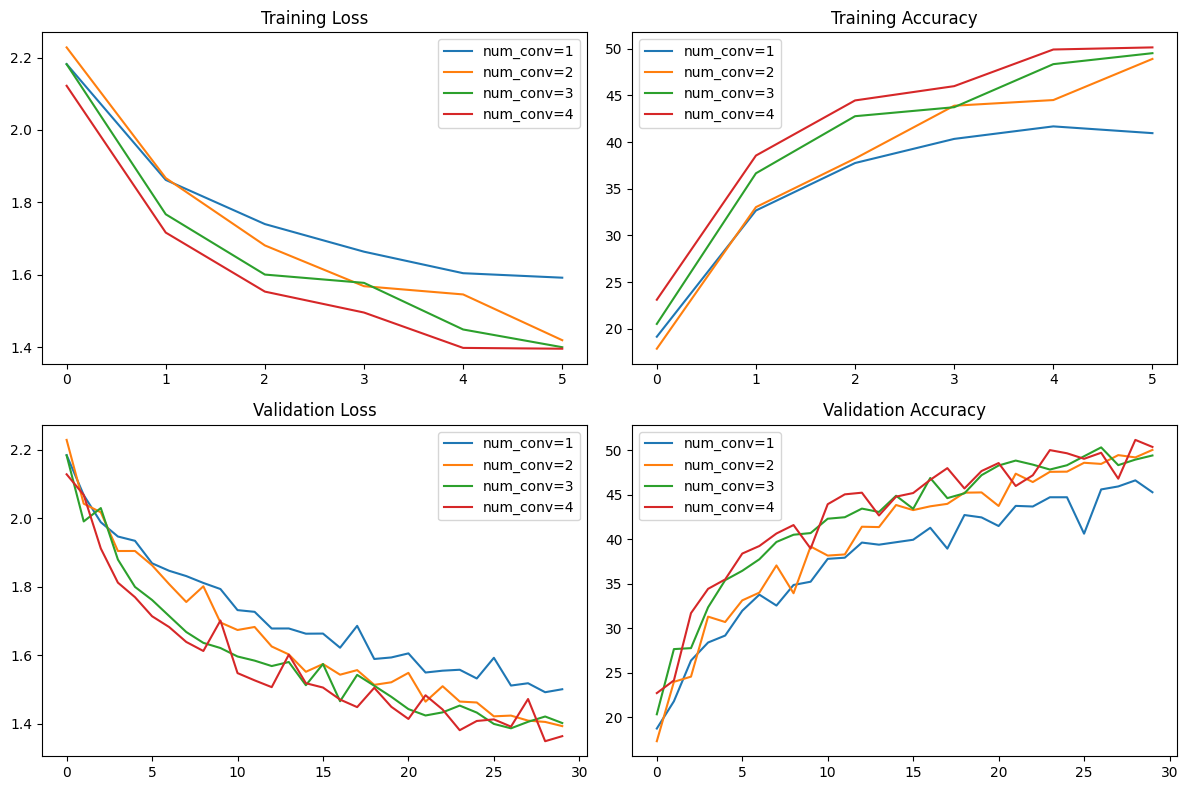

In [24]:
import torchinfo
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from torchinfo import summary

# Assuming train_dataloader, val_dataloader, train_one_epoch, evaluate,
# Classifier, loss_fn, dev, batch_size are already defined as in your notebook

# Define a list of num_conv values to test
num_conv_values = [1, 2, 3, 4]

# Initialize dictionaries to store learning curves
learning_curves = {}
for num_conv in num_conv_values:
    learning_curves[num_conv] = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': []
    }

# Loop through each num_conv value
for num_conv in num_conv_values:
    # Create a new classifier with the current num_conv
    model = Classifier(32, 4, num_conv).to(device=dev)

    # Print the model summary (optional)
    print(f"Model Summary for num_conv = {num_conv}:")
    print(summary(model, input_size=(batch_size, 3, 32, 32)))

    # Reset the optimizer for each new model
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001, weight_decay=0.01)

    # Train and evaluate the model for the current num_conv
    epochs = 30
    for j in range(epochs):
        with tqdm(total=len(train_dataloader), position=0, leave=True,
                 desc=f"Train Epoch {j} (num_conv = {num_conv})") as train_bar:
            train_one_epoch(train_dataloader, model, loss_fn, optimizer, train_bar)

        if j % 5 == 0:
            with tqdm(total=len(train_dataloader), position=0, leave=True,
                     desc=f"Validate (train) Epoch {j} (num_conv = {num_conv})") as train_eval:
                acc, loss = evaluate(train_dataloader, model, loss_fn, train_eval)
                print(f"Epoch {j} (num_conv = {num_conv}): training loss: {loss:.3f}, accuracy: {acc:.3f}")
                learning_curves[num_conv]['train_loss'].append(loss)
                learning_curves[num_conv]['train_acc'].append(acc)

        with tqdm(total=len(val_dataloader), position=0, leave=True,
                 desc=f"Validate Epoch {j} (num_conv = {num_conv})") as val_bar:
            acc_val, loss_val = evaluate(val_dataloader, model, loss_fn, val_bar)
            print(f"Epoch {j} (num_conv = {num_conv}): validation loss: {loss_val:.3f}, accuracy: {acc_val:.3f}")
            learning_curves[num_conv]['val_loss'].append(loss_val)
            learning_curves[num_conv]['val_acc'].append(acc_val)

# Plotting the learning curves
plt.figure(figsize=(12, 8))

for num_conv in num_conv_values:
    plt.subplot(2, 2, 1)
    plt.plot(learning_curves[num_conv]['train_loss'], label=f'num_conv={num_conv}')
    plt.title('Training Loss')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(learning_curves[num_conv]['train_acc'], label=f'num_conv={num_conv}')
    plt.title('Training Accuracy')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(learning_curves[num_conv]['val_loss'], label=f'num_conv={num_conv}')
    plt.title('Validation Loss')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(learning_curves[num_conv]['val_acc'], label=f'num_conv={num_conv}')
    plt.title('Validation Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

As the number of convolution layer increases, the training loss and validation loss seem to be lower, and training accuracy and validation accuracy seem to be higher. However, the trend is similar when convolutional layer is 2,3,4 while when num_conv=1 it resulted in higher loss and lower accuracy. This means that as the number of convolution layer increases, it resulted in better performance while there is saturation.